In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
# 文字列をラベル化
for i in range(df_train.shape[1]):
    if df_train.iloc[:,i].dtypes == object:
        lbl = LabelEncoder()
        lbl.fit(list(df_train.iloc[:,i].values) + list(df_test.iloc[:,i].values))
        df_train.iloc[:,i] = lbl.transform(list(df_train.iloc[:,i].values))
        df_test.iloc[:,i] = lbl.transform(list(df_test.iloc[:,i].values))

In [6]:
df_train.isnull().sum()[df_train.isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [7]:
train_ID = df_train['Id']
test_ID = df_test['Id']

y = df_train['SalePrice']
X = df_train.drop(['Id'],axis=1)
X_test = df_test.drop('Id',axis = 1)

X_train = pd.concat([X,X_test])
X_train = X_train.drop(['LotFrontage','MasVnrArea','GarageYrBlt'],axis=1)
X_train = X_train.fillna(X_train.median())


C:\Users\Arisa\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [8]:
X["TotalSF"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"]

In [9]:
X = X.drop(["TotalBsmtSF","1stFlrSF","2ndFlrSF"],axis=1)

In [10]:
corr = X_train.corr()
corr.sort_values(["SalePrice"],ascending=False, inplace = True)
print(corr.SalePrice)

SalePrice        1.000000
OverallQual      0.542911
GrLivArea        0.518393
GarageCars       0.438936
GarageArea       0.432263
TotalBsmtSF      0.428546
1stFlrSF         0.418049
TotRmsAbvGrd     0.392645
FullBath         0.389208
YearBuilt        0.363825
YearRemodAdd     0.354414
Fireplaces       0.329184
BsmtFinSF1       0.270937
Foundation       0.266074
LotArea          0.240126
2ndFlrSF         0.230918
WoodDeckSF       0.225070
OpenPorchSF      0.214320
HalfBath         0.199209
CentralAir       0.174290
Electrical       0.164140
RoofStyle        0.160636
PavedDrive       0.156763
BsmtFullBath     0.155572
BsmtUnfSF        0.152913
SaleCondition    0.150677
Neighborhood     0.143695
HouseStyle       0.126655
BedroomAbvGr     0.117662
RoofMatl         0.106310
                   ...   
Condition2       0.011128
LandContour      0.010935
GarageQual       0.009641
BsmtFinType2     0.009481
Utilities       -0.007632
BsmtFinSF2      -0.010386
BsmtHalfBath    -0.013865
LowQualFinSF

In [11]:
X_train = X_train.drop(['GarageArea'],axis=1)

In [12]:
X = X.drop(['LotFrontage','MasVnrArea','GarageYrBlt'],axis=1)

In [13]:
y.shape

(1460,)

In [14]:
X = X.fillna(X.median())

In [15]:
X = X.drop(['GarageArea','SalePrice'],axis=1)

In [16]:
from sklearn.model_selection import train_test_split
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X,y, test_size=0.3, random_state=0)


In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc_2 = RandomForestClassifier(random_state=0, n_estimators=100)
rfc_2.fit(X_2_train, y_2_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [18]:
importances = rfc_2.feature_importances_
importances


array([0.01645899, 0.00940236, 0.04438731, 0.00069716, 0.00345272,
       0.0126385 , 0.00622407, 0.00013663, 0.01337883, 0.00437355,
       0.0289698 , 0.01120158, 0.00071185, 0.00637179, 0.01459929,
       0.02173896, 0.01874842, 0.0377591 , 0.03494895, 0.01052675,
       0.0017464 , 0.02102976, 0.02200731, 0.0157123 , 0.00791822,
       0.00640008, 0.01058598, 0.01075504, 0.00738499, 0.01487623,
       0.01831838, 0.03487049, 0.00868396, 0.01021815, 0.0408697 ,
       0.00245678, 0.01325829, 0.00309341, 0.00489266, 0.00280517,
       0.04546613, 0.01072428, 0.00407403, 0.00753882, 0.00886569,
       0.01740857, 0.00258442, 0.01095501, 0.02617484, 0.00675526,
       0.01247013, 0.01625724, 0.01101544, 0.01602933, 0.01176027,
       0.00472085, 0.00488714, 0.00401019, 0.02773072, 0.03088795,
       0.01119406, 0.00296666, 0.00902986, 0.00062556, 0.00025911,
       0.01026576, 0.00348367, 0.00426722, 0.03290637, 0.02501533,
       0.00814071, 0.00984698, 0.04707248])

Training done using Random Forest


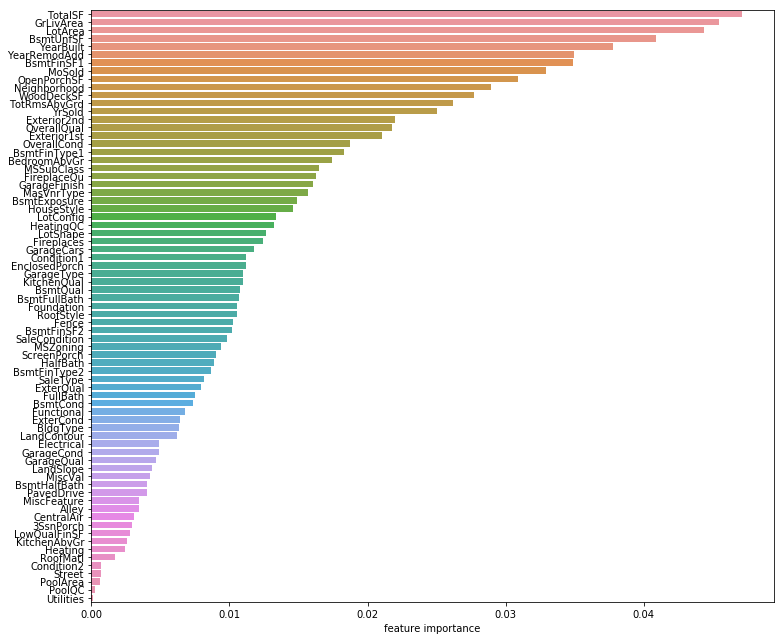

In [19]:
print("Training done using Random Forest")
ranking = np.argsort(-rfc_2.feature_importances_)
f, ax = plt.subplots(figsize=(11, 9))
sns.barplot(x=rfc_2.feature_importances_[ranking], y=X.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

In [20]:
X_train = X.iloc[:,ranking[:30]]

In [21]:
X_train.columns

Index(['TotalSF', 'GrLivArea', 'LotArea', 'BsmtUnfSF', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'MoSold', 'OpenPorchSF', 'Neighborhood',
       'WoodDeckSF', 'TotRmsAbvGrd', 'YrSold', 'Exterior2nd', 'OverallQual',
       'Exterior1st', 'OverallCond', 'BsmtFinType1', 'BedroomAbvGr',
       'MSSubClass', 'FireplaceQu', 'GarageFinish', 'MasVnrType',
       'BsmtExposure', 'HouseStyle', 'LotConfig', 'HeatingQC', 'LotShape',
       'Fireplaces', 'GarageCars'],
      dtype='object')

In [22]:
X_train = pd.concat([X_train,y],axis=1)

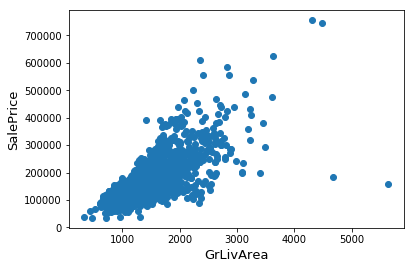

In [23]:
ig, ax = plt.subplots()
ax.scatter(x = X_train['GrLivArea'], y = X_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [24]:
X_train = X_train.drop(X_train[(X_train['GrLivArea']>4700) & (X_train['SalePrice']< 300000)].index)

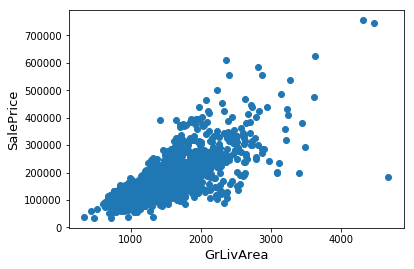

In [25]:
ig, ax = plt.subplots()
ax.scatter(x = X_train['GrLivArea'], y = X_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

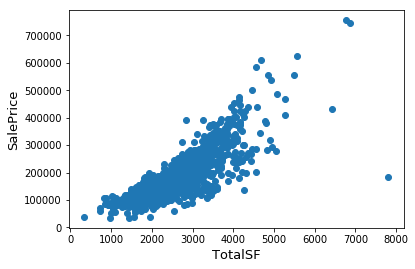

In [26]:
ig, ax = plt.subplots()
ax.scatter(x = X_train['TotalSF'], y = X_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalSF', fontsize=13)
plt.show()

In [27]:
X_train = X_train.drop(X_train[(X_train['TotalSF']>6000) & (X_train['SalePrice']>400000)].index)

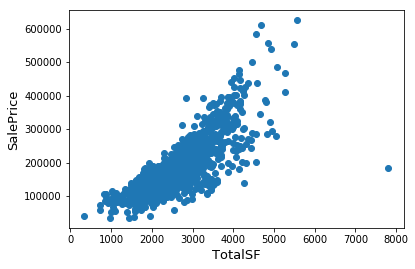

In [28]:
ig, ax = plt.subplots()
ax.scatter(x = X_train['TotalSF'], y = X_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalSF', fontsize=13)
plt.show()

In [29]:
y = X_train['SalePrice']
del X_train['SalePrice']
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.model_selection import KFold
kf_3 = KFold(n_splits=5, shuffle=True, random_state=0)


In [30]:
from sklearn.model_selection import cross_val_score
scores_3 = cross_val_score(lr, X_train,y , cv=kf_3)
scores_3


array([0.87471922, 0.8494426 , 0.78040713, 0.83252824, 0.84225222])

In [31]:
scores_3.mean()

0.8358698816395576

In [32]:
from sklearn.svm import SVC
svc_4 = SVC(kernel='rbf', gamma=0.1, C=1.0)

In [33]:
from sklearn.model_selection import StratifiedKFold
kf_4 = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)


In [34]:
from sklearn.model_selection import cross_val_score
scores_4 = cross_val_score(svc_4, X_train, y, cv=kf_4)


C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [35]:
from sklearn.tree import DecisionTreeClassifier
tree_1 = DecisionTreeClassifier(random_state=0, max_depth=20)
tree_1.fit(X_train, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [36]:
print('train: {:.3f}'.format(tree_1.score(X_train, y)))

train: 0.927


In [50]:
from sklearn.ensemble import RandomForestClassifier
rfc_1 = RandomForestClassifier(random_state=0,max_depth=15, n_estimators=10)
rfc_1.fit(X_train, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [51]:
print('train accuracy: %.3f' % rfc_1.score(X_train, y))

train accuracy: 0.846


In [52]:
X_test["TotalSF"] = X_test["TotalBsmtSF"] + X_test["1stFlrSF"] + X_test["2ndFlrSF"]

KeyError: 'TotalBsmtSF'

In [53]:
X_test = X_test.drop(['LotFrontage','MasVnrArea','GarageYrBlt'],axis=1)
X_test = X_test.fillna(X_test.median())

KeyError: "['LotFrontage' 'MasVnrArea' 'GarageYrBlt'] not found in axis"

In [41]:
X_test = X_test.drop(["TotalBsmtSF","1stFlrSF","2ndFlrSF"],axis=1)

In [43]:
X_test = X_test.iloc[:,ranking[:30]]

In [44]:
X_test.shape

(1459, 30)

In [54]:
y_test_pred = rfc_1.predict(X_test)

In [55]:
y_test_pred

array([ 91000, 124500, 179900, ...,  91000,  91300, 179900], dtype=int64)

In [56]:
submission = pd.DataFrame({
    "Id": test_ID,
    "SalePrice": y_test_pred
})
submission.to_csv('submission3.csv', index=False)